Train data shape: (42000, 785)
Test data shape: (42000, 785)
Determined image size: 28x28


C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - loss: 3.9999 - mae: 1.5797 - val_loss: 3.3895 - val_mae: 1.4862
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 3.5972 - mae: 1.5084 - val_loss: 3.7943 - val_mae: 1.5419
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 3.4997 - mae: 1.4883 - val_loss: 3.3879 - val_mae: 1.4399
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 3.4822 - mae: 1.4802 - val_loss: 3.4069 - val_mae: 1.4788
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - loss: 3.5721 - mae: 1.5042 - val_loss: 3.2569 - val_mae: 1.4360
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 3.4519 - mae: 1.4731 - val_loss: 3.4536 - val_mae: 1.4807
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 3.4854 - mae: 1.4837 - val_loss: 3.4534 - val_mae: 1.5043
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - loss: 3.5144 - mae: 1.4897 - val_loss: 3.4361 - val_mae: 1.4840
Epoch 9/10
1313/1313 ━━━

C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - loss: 9.1731 - mae: 2.3934 - val_loss: 3.4530 - val_mae: 1.4943
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - loss: 3.6716 - mae: 1.5265 - val_loss: 3.0881 - val_mae: 1.3723
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - loss: 3.3465 - mae: 1.4377 - val_loss: 3.0309 - val_mae: 1.3187
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - loss: 3.3325 - mae: 1.4255 - val_loss: 3.6932 - val_mae: 1.5578
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 45s 21ms/step - loss: 3.3665 - mae: 1.4276 - val_loss: 3.6410 - val_mae: 1.4787
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 3.5444 - mae: 1.4694 - val_loss: 3.1399 - val_mae: 1.4208
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - loss: 3.3843 - mae: 1.4284 - val_loss: 5.1581 - val_mae: 1.9164
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 3.4342 - mae: 1.4506 - val_loss: 3.8390 - val_mae: 1.5995
Epoch 9/10
1313/1313 ━━━

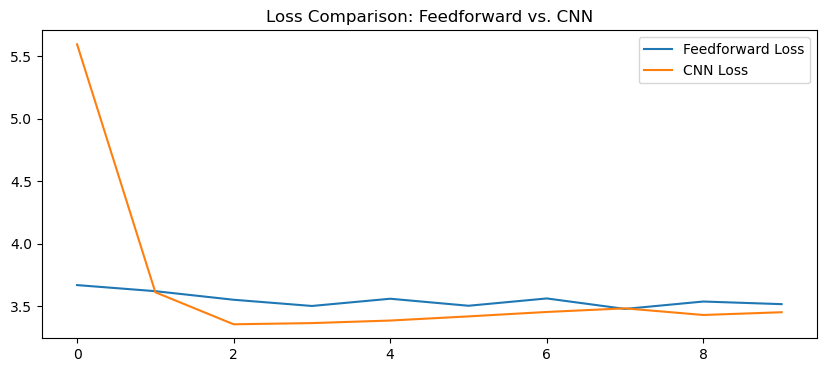

Feedforward network captures simple linear patterns, while CNN extracts spatial features.


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import layers, models

train_path = "C:\\Users\\Dharani Ravi\\Downloads\\digit-recognizer\\train.csv"
test_path = "C:\\Users\\Dharani Ravi\\Downloads\\digit-recognizer\\train.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

num_pixels_train = train_df.shape[1] - 1  
num_pixels_test = test_df.shape[1] - 1 

if num_pixels_train != num_pixels_test:
    raise ValueError("Mismatch in image sizes between train and test datasets.")

img_size = int(np.sqrt(num_pixels_train))  
print(f"Determined image size: {img_size}x{img_size}")

X_train = train_df.iloc[:, 1:].values.reshape(-1, img_size, img_size, 1) / 255.0 
y_train = train_df.iloc[:, 0].values  

X_test = test_df.iloc[:, 1:].values.reshape(-1, img_size, img_size, 1) / 255.0
y_test = test_df.iloc[:, 0].values

ff_model = models.Sequential([
    layers.Flatten(input_shape=(img_size, img_size, 1)),
    layers.Dense(2, activation='relu'),
    layers.Dense(1) 
])

ff_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05), loss='mse', metrics=['mae'])

ff_history = ff_model.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test))

cnn_model = models.Sequential([
    layers.Conv2D(1, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    layers.Flatten(),
    layers.Dense(1)  
])

cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05), loss='mse', metrics=['mae'])

cnn_history = cnn_model.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test))

plt.figure(figsize=(10, 4))
plt.plot(ff_history.history['loss'], label='Feedforward Loss')
plt.plot(cnn_history.history['loss'], label='CNN Loss')
plt.title("Loss Comparison: Feedforward vs. CNN")
plt.legend()
plt.show()

print("Feedforward network captures simple linear patterns, while CNN extracts spatial features.")
